<center><img src="./images/rtu_logo_lv.png" alt="RTU" title="RTU" width="150em"/></center>

<center><b>RĪGAS TEHNISKĀ UNIVERSITĀTE</b></center>
<center><b>DATORZINĀTNES UN INFORMĀCIJAS TEHNOLOĢIJAS FAKULTĀTE</b></center>
<center><b>Priekšmeta "Ievads mākslīgos neironu tīklos"</b></center><center>

<center><b>3. mājasdarbs</b></center>

<div style="text-align: right">
    LDsI 12300 Lietišķo datorsistēmu institūts<br>
    RDBD0 Datorsistēmas<br>
    <b>3. kursa 3. grupas</b> pilna laika klātienes <b>students</b><br>
    Oļegs Korsaks<br>
    <b>Studenta apliecības Nr.: </b>051RDB146<br>
</div>
<center><b>Rīga, 2021</b></center>
<div style="display:none">\pagebreak</div>

***

## Risināma uzdevuma nostādne <a class="anchor" id="chapter1"></a>

1. Izvēlēties uzdevumu un sagatavot datu kopu ar vismaz 20 ierakstiem, kuriem jābūt aprakstītiem ar vismaz diviem skaitliskiem atribūtiem.
2. Izveidot viendimensiālo (vai 2D) SOM tīklu ar vismaz trim neironiem. Izmantojiet apmācības koeficientu ŋ=0.1.
3. Apmācīt neironu tīklu, izmantojot izvēlētā varianta datus.
4. ~~Augstākam novērtējumam: realizēt SOM tīkla apmācību, kas paredz topoloģiskās apkaimes Sw(t) un attiecīgās enerģijas aprēķināšanu blakus neironu svaru koriģēšanai.~~
5. „Paspēlēties” ar SOM, mainot apmācības koeficientu (piem. ŋ=0.3;0.5;0.7;0.9).
6. Atskaitē atbildēt uz jautājumiem:
    * Kurā brīdī (iterācijas numurs) tīklu var uzskatīt par apmācītu?
    * Kā apmācības koeficients ietekmē kļūdas konverģenci?
    * Paskaidrojiet, kā var koriģēt apmācības koeficientu, lai ātrāk apmācītu tīklu?
    * Parādiet, kā dati tika klasterizēti (vismaz aprakstiet, no kādiem elementiem sastāv klasteri).

**Izvēlējos: Variants II. Medicīniskai iestādei ir nepieciešams klasterizēt pacientus trijās grupās pēc viņu svara
un auguma.**

In [1]:
%matplotlib inline

In [2]:
import copy
import math

from random import random

import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('notebook', font_scale=2.0)
sns.set_style('darkgrid')

from matplotlib import pyplot as plt

### Dati

In [3]:
# Patient: Weight, Height

data = {
    'VU1': (77, 170),
    'VU2': (1452, 110),
    'VU3': (20345, 178),
    'VU4': (1024, 150),
    'VU5': (7341, 153),
    'VU6': (4205, 121),
    'VU7': (1452, 181),
    'VU8': (20345, 130),
    'VU9': (1024, 165),
    'VU10': (7341, 161),
    'VU11': (61, 148),
    'VU12': (59, 141),
    'VU13': (40, 118),
    'VU14': (61, 133),
    'VU15': (81, 120),
    'VU16': (94, 171),
    'VU17': (110, 200),
    'VU18': (94, 160),
    'VU19': (444, 182),
    'VU20': (333, 191),
    'VU21': (834, 171),
    'VU22': (43, 145),
    'VU23': (10, 30),
    'VU24': (20, 50),
    'VU25': (5, 28),
}

Grafiku zīmēšanas funkcijas

In [4]:
neuron_colors = ('red', 'yellow', 'green')


def plot_neurons(plt, neurons: tuple[list[float]], neuron_colors: tuple[str], line_color: str = 'black'):
    plt.plot([neurons[0][0], neurons[1][0]],[neurons[0][1], neurons[1][1]], c=line_color)
    plt.plot([neurons[1][0], neurons[2][0]],[neurons[1][1], neurons[2][1]], c=line_color)
    plt.plot([neurons[2][0], neurons[0][0]],[neurons[2][1], neurons[0][1]], c=line_color)

    for neuron, color in zip(neurons, neuron_colors):
        plt.scatter(neuron[0], neuron[1], c=color, linewidth=1, edgecolors='black')


def plot_samples(plt, samples):
    x = [item[0] for item in samples]
    y = [item[1] for item in samples]
    plt.scatter(x, y, linewidth=1, edgecolors='black')

Apmācīšanas funkcija

In [5]:
def fit(neurons: tuple[list[float]], samples: tuple[list[float]], epochs: int, learning_rate: float):
    for epoch in range(epochs):
        previous_neurons = copy.deepcopy(neurons)

        for sample in samples:
            bmu_distance = float('inf')
            bmu_idx = 0
            bmu_weight_vector = None

            for idx, weight_vector in enumerate(neurons):
                distance = math.sqrt((sample[0] - weight_vector[0]) ** 2 + (sample[1] - weight_vector[1]) ** 2)

                if distance < bmu_distance:
                    bmu_distance = distance
                    bmu_idx = idx
                    bmu_weight_vector = weight_vector

            bmu_weight_vector[0] = bmu_weight_vector[0] + learning_rate * (sample[0] - bmu_weight_vector[0])
            bmu_weight_vector[1] = bmu_weight_vector[1] + learning_rate * (sample[1] - bmu_weight_vector[1])

            for idx, weight_vector in enumerate(neurons):
                if idx == bmu_idx:
                    nt = learning_rate
                else:
                    nt = learning_rate * 0.125
                    
                weight_vector[0] = weight_vector[0] + nt * (sample[0] - weight_vector[0])
                weight_vector[1] = weight_vector[1] + nt * (sample[1] - weight_vector[1])
        
        if neurons == previous_neurons:
            print(f'Neurons stabilized at epoch: {epoch+1}')
            
            break

Pamēģināsim dažadus apmācības koeficientus, kā prasīts uzdevumā:

learning_rate=0.1; epochs=1


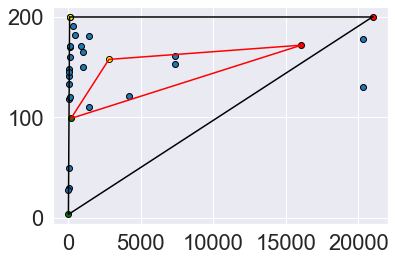

learning_rate=0.1; epochs=3


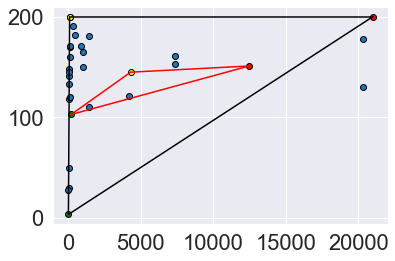

learning_rate=0.1; epochs=5


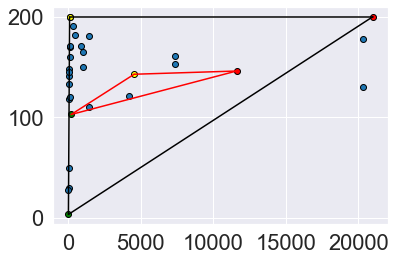

learning_rate=0.1; epochs=10


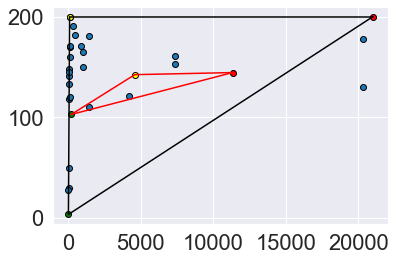

learning_rate=0.1; epochs=20


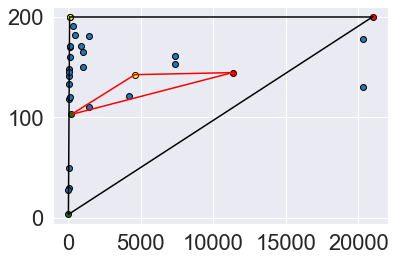

learning_rate=0.1; epochs=100
Neurons stabilized at epoch: 51


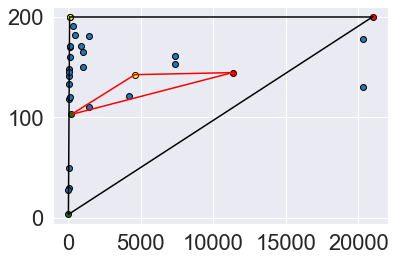

learning_rate=0.3; epochs=1


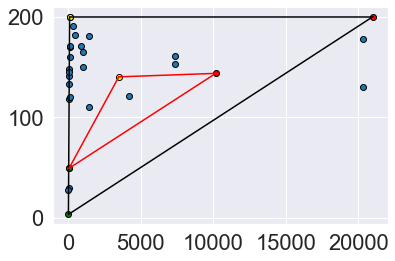

learning_rate=0.3; epochs=3


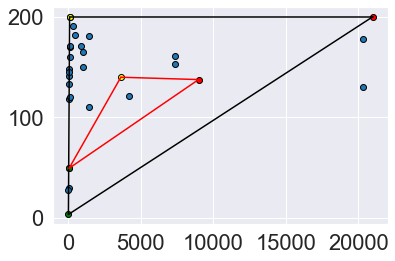

learning_rate=0.3; epochs=5


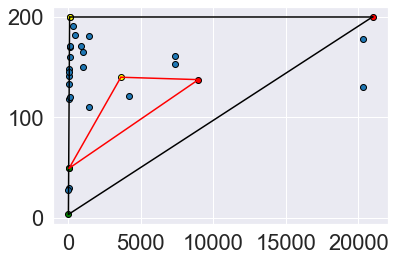

learning_rate=0.3; epochs=10


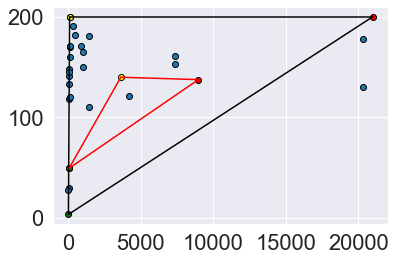

learning_rate=0.3; epochs=20
Neurons stabilized at epoch: 18


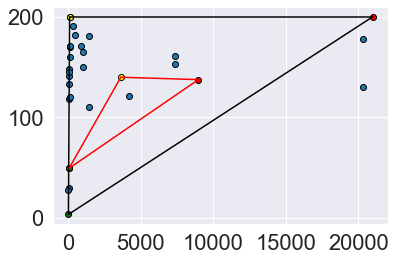

learning_rate=0.3; epochs=100
Neurons stabilized at epoch: 18


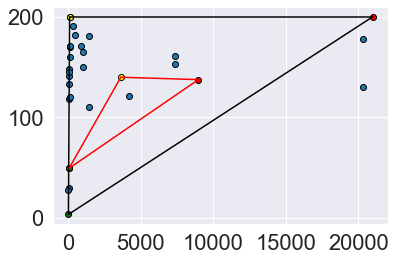

learning_rate=0.5; epochs=1


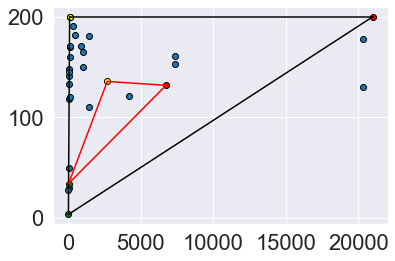

learning_rate=0.5; epochs=3


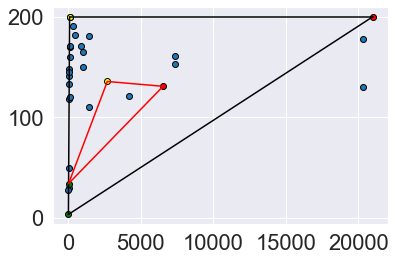

learning_rate=0.5; epochs=5


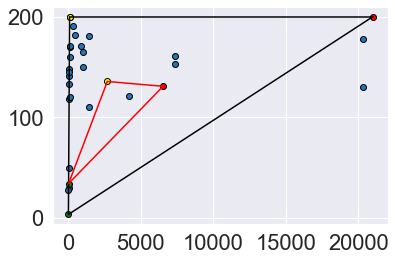

learning_rate=0.5; epochs=10
Neurons stabilized at epoch: 10


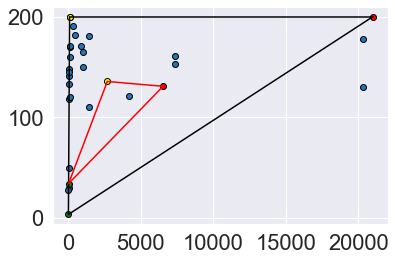

learning_rate=0.5; epochs=20
Neurons stabilized at epoch: 10


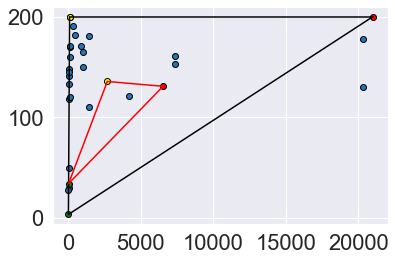

learning_rate=0.5; epochs=100
Neurons stabilized at epoch: 10


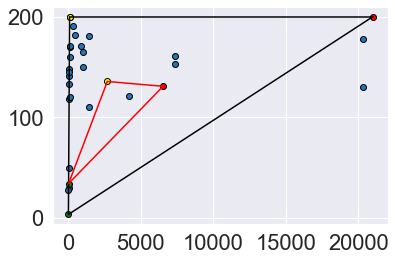

learning_rate=0.7; epochs=1


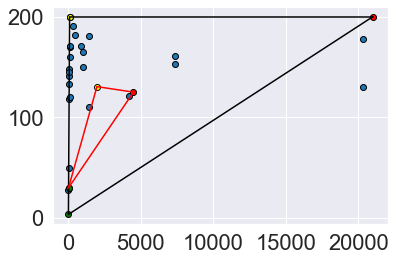

learning_rate=0.7; epochs=3


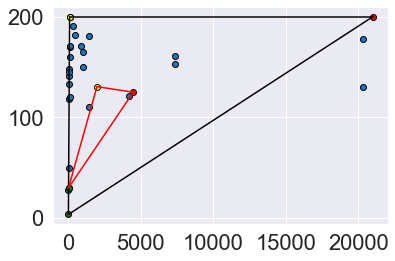

learning_rate=0.7; epochs=5


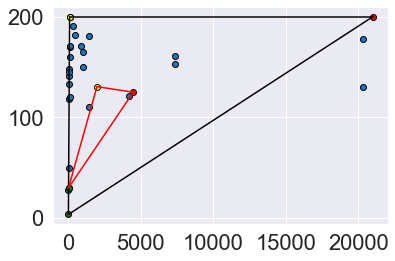

learning_rate=0.7; epochs=10
Neurons stabilized at epoch: 7


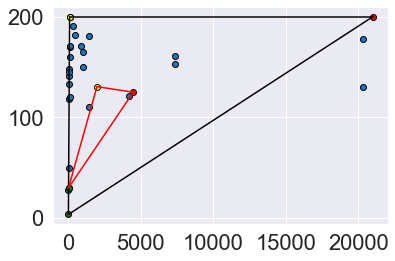

learning_rate=0.7; epochs=20
Neurons stabilized at epoch: 7


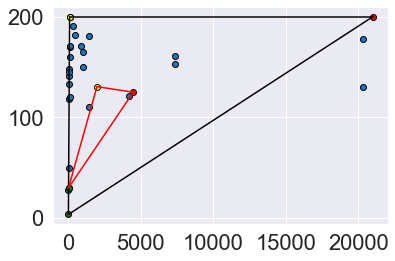

learning_rate=0.7; epochs=100
Neurons stabilized at epoch: 7


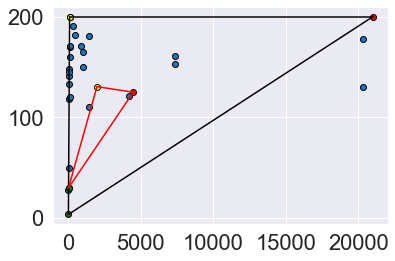

learning_rate=0.9; epochs=1


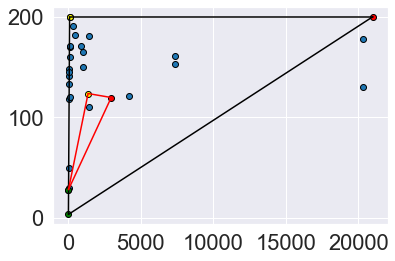

learning_rate=0.9; epochs=3


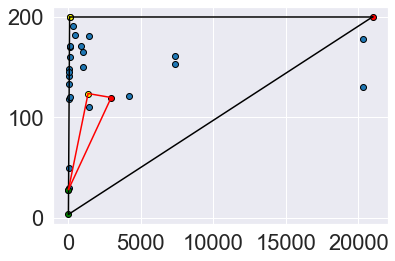

learning_rate=0.9; epochs=5
Neurons stabilized at epoch: 5


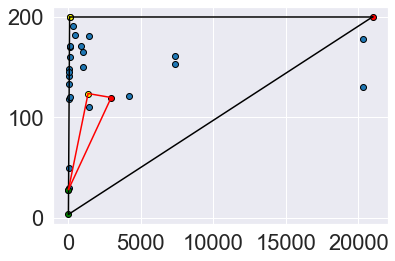

learning_rate=0.9; epochs=10
Neurons stabilized at epoch: 5


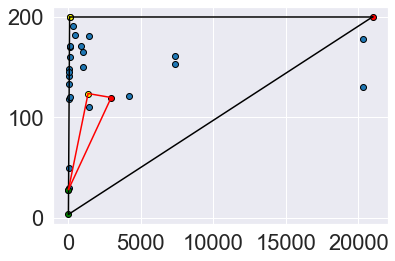

learning_rate=0.9; epochs=20
Neurons stabilized at epoch: 5


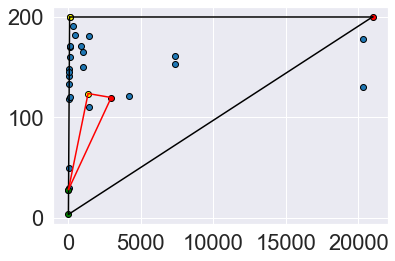

learning_rate=0.9; epochs=100
Neurons stabilized at epoch: 5


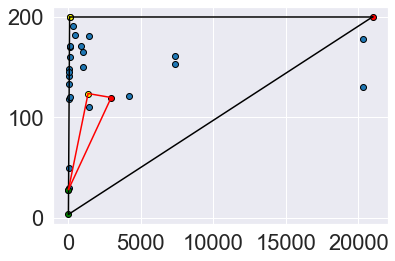

In [6]:
for learning_rate in (0.1, 0.3, 0.5, 0.7, 0.9):
    for epochs in (1, 3, 5, 10, 20, 100):
        neurons = ( # input nodes
            [21000.0, 200.0], # huge people
            [80.0, 200.0], # normal people
            [0.0, 3.5], # children
        )
        samples = tuple(data.values())
        print(f'{learning_rate=}; {epochs=}')
        plot_samples(plt, samples)
        plot_neurons(plt, neurons, neuron_colors)
        
        fit(neurons, samples, epochs=epochs, learning_rate=learning_rate)
        
        plot_neurons(plt, neurons, neuron_colors, 'red')
        plt.show()

## Secinājumi

1. Tīklu var uzskatīt par apmācītu (adaptētu) pie:
    * learning_rate=0.1: 51. epohā
    * learning_rate=0.3: 18. epohā
    * learning_rate=0.5: 10. epohā
    * learning_rate=0.7: 7. epohā
    * learning_rate=0.9: 5. epohā

~~Kā apmācības koeficients ietekmē kļūdas konverģenci?~~

3. Palielinot learning_rate, var paātrināt tīkla apmācību, bet neesmu pārliecināts, ka vienmēr.

4. Dati tika klasterizēti (paņemsim learning_rate=0.9):
    * Bērni - augums zem 100
    * Normāli cilvēki - augums virs 100, svars zem ~2000
    * Ļoti lieli cilvēki - augums virs 100, svars virs ~4000